In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import load_model

## loading data

In [ ]:
#loading data from csv file
df = pd.read_csv("/content/drive/My Drive/datasets/pokemon_data.csv")

In [ ]:
#from excel file
#df = pd.read_excel("name/path of your file")

In [ ]:
#from text
#pd.read_csv("name/path of your file",delimiter = '\t')

In [ ]:
#viewing the first n rows
df.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [ ]:
#viewing the last n rows
df.tail(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [ ]:
#finding columns with nan values
df.isnull().sum()#you can use .any() instead of .sum() but in that case any() will return true/false

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
#unique values in a column
len(df['Type 1'].unique())#and we find how many there are

18

## Reading data in pnadas

In [ ]:
#reading headers(columns' names)
print(df.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [ ]:
#reading columns
print(df["Name"])


#multiple columns
print("\n\nmultiple columns:")
print(df[["Name","Type 1","HP"]])

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
795                  Diancie
796      DiancieMega Diancie
797      HoopaHoopa Confined
798       HoopaHoopa Unbound
799                Volcanion
Name: Name, Length: 800, dtype: object


multiple columns:
                      Name   Type 1  HP
0                Bulbasaur    Grass  45
1                  Ivysaur    Grass  60
2                 Venusaur    Grass  80
3    VenusaurMega Venusaur    Grass  80
4               Charmander     Fire  39
..                     ...      ...  ..
795                Diancie     Rock  50
796    DiancieMega Diancie     Rock  50
797    HoopaHoopa Confined  Psychic  80
798     HoopaHoopa Unbound  Psychic  80
799              Volcanion     Fire  80

[800 rows x 3 columns]


In [ ]:
#reading rows
print(df.iloc[0].values)#the .values is to remove the column names that would otherwise proceed the values. basically it's for better formatting

#multiple rows
print("\n\nmultiple rows:")
print(df.iloc[0:4])

[1 'Bulbasaur' 'Grass' 'Poison' 45 49 49 65 65 45 1 False]


multiple rows:
   #                   Name Type 1  ... Speed  Generation  Legendary
0  1              Bulbasaur  Grass  ...    45           1      False
1  2                Ivysaur  Grass  ...    60           1      False
2  3               Venusaur  Grass  ...    80           1      False
3  3  VenusaurMega Venusaur  Grass  ...    80           1      False

[4 rows x 12 columns]


In [ ]:
#iterating through rows
for index,row in df.iterrows():
  print(index,row.values)

0 [1 'Bulbasaur' 'Grass' 'Poison' 45 49 49 65 65 45 1 False]
1 [2 'Ivysaur' 'Grass' 'Poison' 60 62 63 80 80 60 1 False]
2 [3 'Venusaur' 'Grass' 'Poison' 80 82 83 100 100 80 1 False]
3 [3 'VenusaurMega Venusaur' 'Grass' 'Poison' 80 100 123 122 120 80 1 False]
4 [4 'Charmander' 'Fire' nan 39 52 43 60 50 65 1 False]
5 [5 'Charmeleon' 'Fire' nan 58 64 58 80 65 80 1 False]
6 [6 'Charizard' 'Fire' 'Flying' 78 84 78 109 85 100 1 False]
7 [6 'CharizardMega Charizard X' 'Fire' 'Dragon' 78 130 111 130 85 100 1
 False]
8 [6 'CharizardMega Charizard Y' 'Fire' 'Flying' 78 104 78 159 115 100 1
 False]
9 [7 'Squirtle' 'Water' nan 44 48 65 50 64 43 1 False]
10 [8 'Wartortle' 'Water' nan 59 63 80 65 80 58 1 False]
11 [9 'Blastoise' 'Water' nan 79 83 100 85 105 78 1 False]
12 [9 'BlastoiseMega Blastoise' 'Water' nan 79 103 120 135 115 78 1 False]
13 [10 'Caterpie' 'Bug' nan 45 30 35 20 20 45 1 False]
14 [11 'Metapod' 'Bug' nan 50 20 55 25 25 30 1 False]
15 [12 'Butterfree' 'Bug' 'Flying' 60 45 50 90 80 

In [ ]:
#rows containing a specific value
print(df.loc[df["Type 1"] == "Poison"])

       #              Name  Type 1  ... Speed  Generation  Legendary
28    23             Ekans  Poison  ...    55           1      False
29    24             Arbok  Poison  ...    80           1      False
34    29  Nidoran (Female)  Poison  ...    41           1      False
35    30          Nidorina  Poison  ...    56           1      False
36    31         Nidoqueen  Poison  ...    76           1      False
37    32    Nidoran (Male)  Poison  ...    50           1      False
38    33          Nidorino  Poison  ...    65           1      False
39    34          Nidoking  Poison  ...    85           1      False
46    41             Zubat  Poison  ...    55           1      False
47    42            Golbat  Poison  ...    90           1      False
95    88            Grimer  Poison  ...    25           1      False
96    89               Muk  Poison  ...    50           1      False
117  109           Koffing  Poison  ...    35           1      False
118  110           Weezing  Poison

## sorting/descriping data

In [ ]:
#useful stats
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
#sorting your data
df.sort_values("Attack")#sorts ascendingly because it's default

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
488,440,Happiny,Normal,NaN,100,5,5,15,65,30,4,False
121,113,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
230,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
261,242,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
139,129,Magikarp,Water,NaN,20,10,55,15,20,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
429,386,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False


In [ ]:
#to sort according to more than one column you need to put the columns in a list
df.sort_values(["Attack","Defense"], ascending = "false" )#the last parameter is to sort descendingly

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
488,440,Happiny,Normal,NaN,100,5,5,15,65,30,4,False
261,242,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
139,129,Magikarp,Water,NaN,20,10,55,15,20,80,1,False
230,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
429,386,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False


In [ ]:
#you can choose which column to make ascending or descending
df.sort_values(["HP","Attack","Defense"], ascending = [1,0,1] )

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,1,90,45,30,30,40,3,False
55,50,Diglett,Ground,NaN,10,55,25,35,45,95,1,False
186,172,Pichu,Electric,NaN,20,40,15,35,35,60,2,False
388,355,Duskull,Ghost,NaN,20,40,90,30,90,25,3,False
487,439,Mime Jr.,Psychic,Fairy,20,25,45,70,90,60,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...
655,594,Alomomola,Water,NaN,165,75,80,40,45,65,5,False
351,321,Wailord,Water,NaN,170,90,45,90,45,60,3,False
217,202,Wobbuffet,Psychic,NaN,190,33,58,33,58,33,2,False
121,113,Chansey,Normal,NaN,250,5,5,35,105,50,1,False


## making changes to your data

In [ ]:
#we will add an additional column called total that contains the sum of numerical features
df["total"] = df.iloc[:,4:10].sum(axis=1)#axis = 1 specifies that we're summing the columns other wise it would sum the rows if you remove it you will see that
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


In [ ]:
#rearranging columns
cols = list(df.columns.values)
cols

['#',
 'Name',
 'Type 1',
 'Type 2',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary',
 'total']

In [ ]:
df2 =  df[cols[0:-2] + [cols[-1]] +  [cols[-2]] ]#put single columns inside a list
df2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,318,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,405,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,525,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,625,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,309,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,600,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,700,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,600,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,680,True


### saving data

In [ ]:
#csv format
df2.to_csv("/content/drive/My Drive/datasets/pokemon2.csv", index = False)
#our data is already indexed so we don't need the saved file to be indexed one more

In [ ]:
#excel format
df2.to_excel("/content/drive/My Drive/datasets/pokemon2_xl.xlsx", index = False)

In [ ]:
#text format
df2.to_csv("/content/drive/My Drive/datasets/pokemon2_txt.txt", sep = '\t', index = False)#sep is to sperate our data columns

## filtering data

In [ ]:
#one condition
df2.loc[df2["Attack"] > 20]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,318,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,405,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,525,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,625,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,309,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,600,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,700,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,600,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,680,True


In [ ]:
#multiple conditions
df2.loc[ (df["Attack"] > 20) & (df["Defense"] > 50) | (df["Type 2"] == "Poison") ]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,318,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,405,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,525,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,625,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,405,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,600,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,700,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,600,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,680,True


In [ ]:
new_df = df2.loc[ (df["Attack"] > 20) & (df["Defense"] > 50) & (df["Type 2"] == "Poison") ]
new_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total,Legendary
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,405,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,525,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,625,False
48,43,Oddish,Grass,Poison,45,50,55,75,65,30,1,320,False
49,44,Gloom,Grass,Poison,60,65,70,85,75,40,1,395,False
50,45,Vileplume,Grass,Poison,75,80,85,110,90,50,1,490,False
54,49,Venomoth,Bug,Poison,70,65,60,90,75,90,1,450,False
77,71,Victreebel,Grass,Poison,80,105,65,100,70,70,1,490,False
79,73,Tentacruel,Water,Poison,80,70,65,80,120,100,1,515,False
101,94,Gengar,Ghost,Poison,60,65,60,130,75,110,1,500,False


In [ ]:
#when filtering the data like this, it's better to reset the indeces
new_df = new_df.reset_index()
new_df

,index,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total,Legendary
0,1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,405,False
1,2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,525,False
2,3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,625,False
3,48,43,Oddish,Grass,Poison,45,50,55,75,65,30,1,320,False
4,49,44,Gloom,Grass,Poison,60,65,70,85,75,40,1,395,False
5,50,45,Vileplume,Grass,Poison,75,80,85,110,90,50,1,490,False
6,54,49,Venomoth,Bug,Poison,70,65,60,90,75,90,1,450,False
7,77,71,Victreebel,Grass,Poison,80,105,65,100,70,70,1,490,False
8,79,73,Tentacruel,Water,Poison,80,70,65,80,120,100,1,515,False
9,101,94,Gengar,Ghost,Poison,60,65,60,130,75,110,1,500,False


### filtering based on text

In [ ]:
#if it contains a sub string
df2.loc[df["Name"].str.contains("Van")]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total,Legendary
643,582,Vanillite,Ice,NaN,36,50,50,65,60,44,5,305,False
644,583,Vanillish,Ice,NaN,51,65,65,80,75,59,5,395,False
645,584,Vanilluxe,Ice,NaN,71,95,85,110,95,79,5,535,False


In [ ]:
#not containing a sub string
df2.loc[~df["Name"].str.contains("a")]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total,Legendary
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,314,False
15,12,Butterfree,Bug,Flying,60,45,50,90,80,70,1,395,False
16,13,Weedle,Bug,Poison,40,35,30,20,20,50,1,195,False
18,15,Beedrill,Bug,Poison,65,90,40,45,80,75,1,395,False
20,16,Pidgey,Normal,Flying,40,45,40,35,35,56,1,251,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,NaN,68,75,53,83,113,60,6,452,False
777,707,Klefki,Steel,Fairy,57,80,91,80,87,75,6,470,False
787,711,GourgeistSuper Size,Ghost,Grass,85,100,122,58,75,54,6,494,False
788,712,Bergmite,Ice,NaN,55,69,85,32,35,28,6,304,False


In [ ]:
#using regular expressions
import re

df2.loc[ df2["Type 1"].str.contains("dragon|steel", flags = re.I, regex = True) ]#flags = re.I makes the search ignore the capital/small case

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total,Legendary
159,147,Dratini,Dragon,NaN,41,64,45,50,50,50,1,300,False
160,148,Dragonair,Dragon,NaN,61,84,65,70,70,70,1,420,False
161,149,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,600,False
223,208,Steelix,Steel,Ground,75,85,200,55,65,30,2,510,False
224,208,SteelixMega Steelix,Steel,Ground,75,125,230,55,95,30,2,610,False
245,227,Skarmory,Steel,Flying,65,80,140,40,70,70,2,465,False
328,303,Mawile,Steel,Fairy,50,85,85,55,55,50,3,380,False
329,303,MawileMega Mawile,Steel,Fairy,50,105,125,55,95,50,3,480,False
330,304,Aron,Steel,Rock,50,70,100,40,40,30,3,330,False
331,305,Lairon,Steel,Rock,60,90,140,50,50,40,3,430,False


In [ ]:
df.loc[ df["Type 1"].str.contains("d(a-z)*", flags = re.I, regex = True) ]
#d(a-z)* means:the string contains d followed by any set of charcters from a to z the * means the d followed by 1 or more charcters

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total
32,27,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,300
33,28,Sandslash,Ground,NaN,75,100,110,45,55,65,1,False,450
55,50,Diglett,Ground,NaN,10,55,25,35,45,95,1,False,265
56,51,Dugtrio,Ground,NaN,35,80,50,50,70,120,1,False,405
112,104,Cubone,Ground,NaN,50,50,95,40,50,35,1,False,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,704,Goomy,Dragon,NaN,45,50,35,55,75,40,6,False,300
775,705,Sliggoo,Dragon,NaN,68,75,53,83,113,60,6,False,452
776,706,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False,600
793,717,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True,680


## conditional changes

In [ ]:
df.loc[df["Type 1"] == "Fire", "Type 1"] = "Flamer"
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Flamer,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


In [ ]:
df.loc[df["total"] > 500,["Type 1", "Type 2"] ] = ["bug", "poison"]
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,bug,poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,bug,poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Flamer,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,bug,poison,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,bug,poison,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,bug,poison,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,bug,poison,80,160,60,170,130,80,6,True,680


In [ ]:
# df.loc[df["total"] > 500,["Type 1", "Type 2"] ] = ["bug", "poison"]

## statistics

In [ ]:
#grouping by the average
df2.groupby("Type 1").mean().sort_values("Attack")

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total,Legendary
Type 1,,,,,,,,,,
Fairy,449.529412,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,413.176471,0.058824
Electric,363.500000,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,443.409091,0.090909
Bug,334.492754,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,378.927536,0.000000
Psychic,380.807018,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228,3.385965,475.947368,0.245614
Ice,423.541667,72.000000,72.750000,71.416667,77.541667,76.291667,63.458333,3.541667,433.458333,0.083333
Grass,344.871429,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143,421.142857,0.042857
Normal,319.173469,77.275510,73.469388,59.846939,55.816327,63.724490,71.551020,3.051020,401.683673,0.020408
Ghost,486.500000,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,439.562500,0.062500
Water,303.089286,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286,2.857143,430.455357,0.035714


In [ ]:
df2.groupby(["Type 1", "Type 2"]).sum()

#   HP  Attack  ...  Generation  total  Legendary
Type 1 Type 2                       ...                              
Bug    Electric  1191  120     124  ...          10    791        0.0
       Fighting   428  160     310  ...           4   1100        0.0
       Fire      1273  140     145  ...          10    910        0.0
       Flying    4008  882     982  ...          40   5873        0.0
       Ghost      292    1      90  ...           3    236        0.0
...               ...  ...     ...  ...         ...    ...        ...
Water  Ice        309  270     250  ...           3   1535        0.0
       Poison     356  185     205  ...           4   1280        0.0
       Psychic    559  435     365  ...           6   2405        0.0
       Rock      1720  283     331  ...          15   1715        0.0
       Steel      395   84      86  ...           4    530        0.0

[136 rows x 10 columns]

In [ ]:
#counting the frequency of unique values in a column
df2.groupby("Type 1").count()["Name"]

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: Name, dtype: int64

## Neural network part

In [ ]:
#now we're done playing with with pandas let's make a neural network 

### data preprocessing

In [ ]:
#but first we need to clean and prepare our data

In [ ]:
df2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,318,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,405,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,525,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,625,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,309,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,600,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,700,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,600,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,680,True


In [ ]:
#we remove drop the index column
df2 = df2.drop(df2.columns[0],1)#the index of the index column is 0
df2

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,318,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,405,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,525,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,625,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,309,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,600,True
796,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,700,True
797,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,600,True
798,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,680,True


In [ ]:
#we split the data into features and labels
X = df2.drop(df2.columns[-1], 1)#take all the columns except the last one
Y = df2.iloc[:,-1]#take the last column
print(X)
print(Y)

                      Name   Type 1  Type 2  ...  Speed  Generation  total
0                Bulbasaur    Grass  Poison  ...     45           1    318
1                  Ivysaur    Grass  Poison  ...     60           1    405
2                 Venusaur    Grass  Poison  ...     80           1    525
3    VenusaurMega Venusaur    Grass  Poison  ...     80           1    625
4               Charmander     Fire     NaN  ...     65           1    309
..                     ...      ...     ...  ...    ...         ...    ...
795                Diancie     Rock   Fairy  ...     50           6    600
796    DiancieMega Diancie     Rock   Fairy  ...    110           6    700
797    HoopaHoopa Confined  Psychic   Ghost  ...     70           6    600
798     HoopaHoopa Unbound  Psychic    Dark  ...     80           6    680
799              Volcanion     Fire   Water  ...     70           6    600

[800 rows x 11 columns]
0      False
1      False
2      False
3      False
4      False
       ...

In [ ]:
#let's encode our lables
le = LabelEncoder()

Y = le.fit_transform(Y)

In [ ]:
Y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

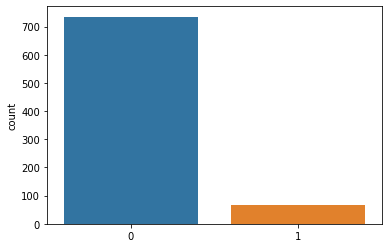

In [ ]:
#let's plot our two classes (the values in the label column) in a bar graph
import seaborn as sns

sns.countplot(Y)#damn it this a really skewed data set I need to learn how to handle that

In [ ]:
#time to lable our text features
X.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,318
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,405
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,525
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,625
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,309


In [ ]:
X.shape

(800, 11)

In [ ]:
#let's check if there's any column containing null values
X.isnull().sum()

Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
total           0
dtype: int64

In [ ]:
#the number of null values in Type 2 is almost the half so we'll drop it
X = X.drop(X.columns[2], 1)
X

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total
0,Bulbasaur,Grass,45,49,49,65,65,45,1,318
1,Ivysaur,Grass,60,62,63,80,80,60,1,405
2,Venusaur,Grass,80,82,83,100,100,80,1,525
3,VenusaurMega Venusaur,Grass,80,100,123,122,120,80,1,625
4,Charmander,Fire,39,52,43,60,50,65,1,309
...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,50,100,150,100,150,50,6,600
796,DiancieMega Diancie,Rock,50,160,110,160,110,110,6,700
797,HoopaHoopa Confined,Psychic,80,110,60,150,130,70,6,600
798,HoopaHoopa Unbound,Psychic,80,160,60,170,130,80,6,680


In [ ]:
X['Name'] = le.fit_transform(X['Name'])
X['Type 1'] = le.fit_transform(X['Type 1'])

In [ ]:
X.head()

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total
0,80,9,45,49,49,65,65,45,1,318
1,329,9,60,62,63,80,80,60,1,405
2,745,9,80,82,83,100,100,80,1,525
3,746,9,80,100,123,122,120,80,1,625
4,102,6,39,52,43,60,50,65,1,309


In [ ]:
#let's see the number of unique values in Name because if there were too many we're droping it as well because it won't be of any if we feed it to the model then
X['Name'].nunique()

800

In [ ]:
#yup we're dropping the Name column from our features
X = X.drop(X.columns[0],1)
X.head()

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total
0,9,45,49,49,65,65,45,1,318
1,9,60,62,63,80,80,60,1,405
2,9,80,82,83,100,100,80,1,525
3,9,80,100,123,122,120,80,1,625
4,6,39,52,43,60,50,65,1,309


In [ ]:
X.nunique()#just checking

Type 1         18
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
total         200
dtype: int64

In [ ]:
#let's split our data into train and test sets

x_train, x_test , y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
#let's see the shape of our data sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(640, 9)
(160, 9)
(640,)
(160,)


first we work on the training set

In [ ]:
x_train.head()

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,total
264,17,100,75,115,90,115,85,2,580
615,6,105,140,55,30,55,95,5,480
329,16,50,105,125,55,95,50,3,480
342,0,65,73,55,47,75,85,3,400
394,14,95,23,48,23,48,23,3,260


In [ ]:
#now we standardize our train data
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_train

array([[ 1.36654857,  1.18102488, -0.12394934, ...,  0.57047837,
        -0.7895929 ,  1.22325838],
       [-0.588838  ,  1.37420995,  1.88708514, ...,  0.91265846,
         1.02817493,  0.39278701],
       [ 1.18878616, -0.75082587,  0.80422042, ..., -0.62715195,
        -0.18367029,  0.39278701],
       ...,
       [-0.588838  ,  1.41284697,  1.57769522, ...,  0.74156842,
        -0.7895929 ,  2.05372975],
       [-0.588838  , -0.98264796, -0.6499122 , ..., -0.25075385,
         0.42225232, -1.02731904],
       [-0.23331317, -0.36445572, -0.43333926, ...,  2.11028879,
        -1.39551551,  1.38935265]])

In [ ]:
#let's standardize the test data
x_test = sc.fit_transform(x_test)
x_test

array([[-1.70396917,  0.9766294 ,  0.79097286, ...,  1.0573681 ,
         0.93933644,  1.32426393],
       [ 0.73362084,  0.26824754, -0.12103044, ..., -0.99200031,
         0.93933644,  0.34364351],
       [-0.76643455, -0.56514288, -0.27303099, ..., -0.28532155,
        -1.41821384, -0.8075196 ],
       ...,
       [ 0.35860699,  0.26824754,  0.03097011, ...,  1.19870385,
         1.528724  ,  0.23279076],
       [-1.32895532,  0.05989994, -0.27303099, ..., -0.28532155,
         0.34994887,  0.77000021],
       [-0.3914207 , -0.35679527, -0.72903263, ...,  0.42135721,
         0.93933644,  0.6420932 ]])

### The actual neural network part

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model = Sequential()
 
model.add(Dense(64, activation = 'relu', input_shape = (640, 9)))
model.add(Dense(64, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 640, 64)           640       
_________________________________________________________________
dense_80 (Dense)             (None, 640, 64)           4160      
_________________________________________________________________
dense_81 (Dense)             (None, 640, 32)           2080      
_________________________________________________________________
dense_82 (Dense)             (None, 640, 16)           528       
_________________________________________________________________
dense_83 (Dense)             (None, 640, 1)            17        
Total params: 7,425
Trainable params: 7,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train,epochs = 10, validation_split = 0.3)

Epoch 1/10
14/14 [==============================] - 0s 11ms/step - loss: 0.6094 - accuracy: 0.8304 - val_loss: 0.5038 - val_accuracy: 0.9219
Epoch 2/10
14/14 [==============================] - 0s 4ms/step - loss: 0.4177 - accuracy: 0.9107 - val_loss: 0.3040 - val_accuracy: 0.9219
Epoch 3/10
14/14 [==============================] - 0s 4ms/step - loss: 0.2629 - accuracy: 0.9107 - val_loss: 0.1869 - val_accuracy: 0.9219
Epoch 4/10
14/14 [==============================] - 0s 4ms/step - loss: 0.1815 - accuracy: 0.9219 - val_loss: 0.1441 - val_accuracy: 0.9375
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 0.1468 - accuracy: 0.9531 - val_loss: 0.1245 - val_accuracy: 0.9375
Epoch 6/10
14/14 [==============================] - 0s 4ms/step - loss: 0.1238 - accuracy: 0.9643 - val_loss: 0.1146 - val_accuracy: 0.9427
Epoch 7/10
14/14 [==============================] - 0s 4ms/step - loss: 0.1095 - accuracy: 0.9598 - val_loss: 0.1094 - val_accuracy: 0.9375
Epoch 8/10
14/14 [=

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.9688


[0.09445694833993912, 0.96875]

In [ ]:
model.save('/content/drive/My Drive/datasets/pokemon_model.h')

INFO:tensorflow:Assets written to: /content/drive/My Drive/datasets/pokemon_model.h/assets


In [ ]:
mymodel = load_model('/content/drive/My Drive/datasets/pokemon_model.h')

In [ ]:
mymodel.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.9688


[0.09445694833993912, 0.96875]